In [118]:
import math
from scipy import stats
import scipy.stats as st
import numpy as np
import pandas as pd

1 Create a class and name it Z-test: 
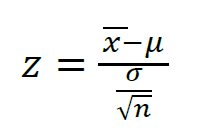



In [119]:


class ZTest:
    def __init__(self, sample_mean, sample_size, pop_mean, pop_std):
        self.sample_mean = sample_mean
        self.sample_size = sample_size
        self.pop_mean = pop_mean
        self.pop_std = pop_std

    def z_score(self):
        numerator = self.sample_mean - self.pop_mean
        denominator = self.pop_std / math.sqrt(self.sample_size)
        return numerator / denominator

    def p_value(self, test_type='two-sided'):
        z = self.z_score()
        if test_type == 'two-sided':
            return 2 * (1 - st.norm.cdf(abs(z)))
        elif test_type == 'greater':
            return 1 - st.norm.cdf(z)
        elif test_type == 'less':
            return st.norm.cdf(z)

1a Z-test:
Suppose we are testing a new model of cell-phone and want to compare its bandwidth to the previous model.

Sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428,  4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658]

State the null and alternative hypotheses.
Use the Z-test to determine whether the new model has a significantly different bandwidth 4.5 GHz from the previous model with a standard deviation of 0.6 GHz, using a significance level of 0.05.
Interpret the results


In [120]:

sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428,  4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658]

sample = np.array(sample)
#
sample_mean = np.mean(sample)

# Our hypothesis:
# H0: The bandwidth of new model of cell-phone is no difference to previous model
# H1: The bandwidth of new model of cell-phone is  differentthan  previous model


# sample size
n = len(sample)

# pop mean and std
pop_mean = 4.5
pop_std = 0.6

#  ZTest 
z_test = ZTest(sample_mean, n, pop_mean, pop_std)

#  the z-score
z_score = z_test.z_score()
print(f'z-score: {z_score}')

# p-value
p_value = z_test.p_value(test_type='two-sided')
print(f'p-value: {p_value}')

if p_value > z_score:
    print ("We accept null hypothesis. The bandwidth of new model of cell-phone is no difference to previous model")
else:
    print ("We reject null hypothesis. The bandwidth of new model of cell-phone is  different than  previous model")

z-score: 2.9318216621320863
p-value: 0.0033698019483017205
We reject null hypothesis. The bandwidth of new model of cell-phone is  different than  previous model


2 Create a class and name it T-test this class includes:

One-sample: df = n - 1
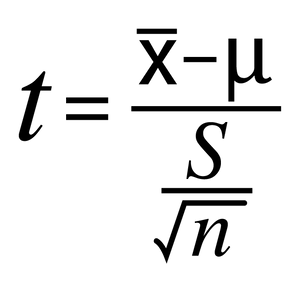

Two-sample: df = n1 + n2 - 2
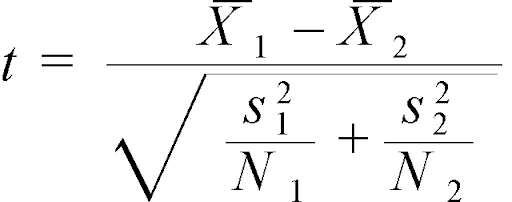

Paired t-test: df = n - 1
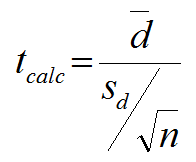

d bar: is the difference between the two samples
Sd is the standard deviation of the difference between samples


In [121]:
# Ttest

class TTest:
    def __init__(self,  alpha=0.05):        
        self.alpha = alpha

    def one_sample(self, sample, pop_mean):
        n = len(sample)
        df = n - 1
        sample_mean = np.mean(sample)
        sample_std = np.std(sample)
        se = sample_std / np.sqrt(n)
        t_score = (sample_mean - pop_mean) / se
        p_value = 2 * (1 - st.t.cdf(abs(t_score), df))
        return t_score, p_value , df

    def two_sample(self, sample1, sample2):
        n1 = len(sample1)
        n2 = len(sample2)
        mean1 = sum(sample1) / n1
        mean2 = sum(sample2) / n2
        var1 = sum([(x - mean1) ** 2 for x in sample1]) / (n1 - 1)
        var2 = sum([(x - mean2) ** 2 for x in sample2]) / (n2 - 1)
        pooled_std = math.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
        t_score = (mean1 - mean2) / (pooled_std * math.sqrt(1 / n1 + 1 / n2))
        p_value = 2 * (1 - st.t.cdf(abs(t_score), df))
        return t_score, p_value

    def paired(self, sample1, sample2):
        n = len(sample1)
        df = n - 1
        diff = sample1 - sample2
        d_bar = np.mean(diff)
        sd = np.std(diff, ddof=1)
        t_score = d_bar / (sd / np.sqrt(n))
        p_value = 2 * (1 - st.t.cdf(abs(t_score), df))
        return t_score, p_value


2a T-test
One sample T-test: Suppose we have a new manufacturing process for producing aluminum cans, and we want to test whether the mean weight of the cans produced using this new process is significantly different from the target weight of 15 grams. We randomly sample 30 cans produced using the new process and measure their weights in grams. We obtain the following data: 

Sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0]

State the null and alternative hypotheses.
Use the appropriate T-test to determine whether the mean weight of the produced cans is equal to the target weight of 15 grams, using a significance level of 0.05.
Interpret the results


In [122]:
# our hypotheis
# H0: Mean weight of the cans produced using new process is not significantly different from the target weight of 15 grams
# H1: Mean weight of the cans produced using new process is  significantly different from the target weight of 15 grams
sample = [14.8, 15.2, 15.1, 15.3, 15.0, 14.9, 15.2, 14.8, 15.1, 15.0, 14.9, 14.8, 15.2, 14.9, 15.0, 14.9, 15.1, 15.3, 15.0, 15.1, 14.8, 15.0, 15.2, 15.1, 15.3, 15.1, 15.0, 14.8, 15.2, 15.0]

sample = np.array(sample)

alpha = 0.05

n = len(sample)

df = n-1

pop_mean1 = 15

# test object
ttest = TTest()

# one sample ttest
t_score, p_value, df = ttest.one_sample(sample,pop_mean1)

print(f't-score: {t_score}')
print(f'p-value: {p_value}')

if p_value > alpha:
    print('We fail to  reject null hypothesis . Mean weight of the cans produced using new process is not significantly different from the target weight of 15 grams')
else:
    print('We reject null hypothesis.')

t-score: 1.287746658813943
p-value: 0.20801598853364545
We fail to  reject null hypothesis . Mean weight of the cans produced using new process is not significantly different from the target weight of 15 grams


2b Two Sample T-test: Suppose a food company has developed a new flavor of potato chips and wants to compare it to the current best-selling flavor. The company randomly selects two groups of 20 customers each. The first group is given the new flavor of potato chips, while the second group is given the best-selling flavor. After trying the potato chips, each customer rates the flavor on a scale of 1 to 10. The following are the flavor ratings for the two groups:

New flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
Best selling flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]

State the null and alternative hypotheses.
Use the appropriate T-test to determine whether there is a significant difference between the two groups or not, using a significance level of 0.05.
Interpret the results


In [123]:

New_flavor = [8, 7, 9, 6, 7, 8, 9, 7, 8, 7, 6, 8, 7, 9, 8, 7, 6, 9, 8, 7]
sample1 = np.array(New_flavor)

Best_selling_flavor = [6, 7, 8, 6, 7, 6, 7, 6, 8, 7, 6, 7, 6, 8, 7, 6, 7, 8, 6, 7]
sample2 = np.array(Best_selling_flavor)


#our hypothesis
# H0: New flavour of potato chips is not different than current best selling flavor
# H1: New flavour of potato chips is different  than current best selling flavor

alpha = 0.05

ttest = TTest()

# two sample t test
t_score, p_value  = ttest.two_sample(sample1,sample2)


print(f't-score: {t_score}')
print(f'p-value: {p_value}')

if p_value > alpha:
    print('We fail to  reject null hypothesis. New flavour of potato chips is not different than current best selling flavor')
else:
    print('We reject null hypothesis.')

t-score: 2.6626213096882494
p-value: 0.012517076252794412
We reject null hypothesis.


Paired T-test: Suppose a company wants to evaluate a new training program for its employees. The company selects 20 employees and measures their productivity before and after the training program. The following are the productivity scores (number of tasks completed per hour) for each employee before and after the training:

Before = [15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12]
After = [18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14]

State the null and alternative hypotheses.
Use the appropriate T-test to determine whether the new training program has had an effect on employee productivity, with a significance level of 0.05.



In [124]:

Before = np.array([15, 18, 12, 10, 17, 16, 12, 14, 19, 18, 11, 13, 16, 17, 19, 14, 16, 13, 15, 12])
After = np.array([18, 20, 15, 13, 19, 18, 14, 16, 21, 20, 14, 16, 19, 20, 22, 16, 18, 15, 17, 14])

#Our Hypothesis
# H0: The mean difference in productivity before and after the training program is zero.
# H1: The mean difference in productivity before and after the training program is not zero.

alpha = 0.05

ttest = TTest()

# two sample t test
t_score, p_value  = ttest.paired(Before,After)


print(f't-score: {t_score}')
print(f'p-value: {p_value}')

if p_value > alpha:
    print('We fail to  reject null hypothesis.')
else:
    print('We reject null hypothesis.The mean difference in productivity before and after the training program is significant')

t-score: -21.354156504062622
p-value: 9.769962616701378e-15
We reject null hypothesis.The mean difference in productivity before and after the training program is significant


3 Create a class and name it ANOVA it includes 

one way
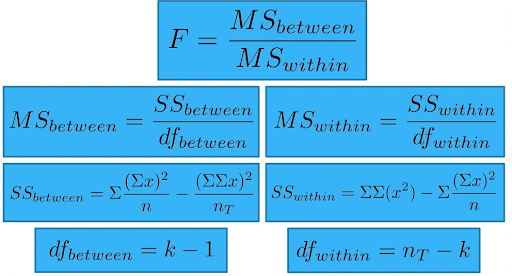

Two ways Using the scipy library

In [125]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


class ANOVA:
    def __init__(self):
        pass
    
    def one_way(self, *args):
        """
        Performs a one-way ANOVA test on multiple groups of data.
        
       
        *args : tuple of arrays in dataframe
            The groups of data to be tested.
        
        Returns:
        F_stat : float
            The F-statistic.
        p_val : float
            The corresponding p-value.
        """
        #  the overall mean
        overall_mean = np.mean(np.concatenate(args))
        
        #  the between-group sum of squares
        ss_between = 0
        for arg in args:
            ss_between += len(arg) * ((np.mean(arg) - overall_mean) ** 2)
        
        #  the within-group sum of squares
        ss_within = 0
        for arg in args:
            ss_within += np.sum((arg - np.mean(arg)) ** 2)
        
        #  the degrees of freedom
        k = len(args)
        n = np.sum([len(arg) for arg in args])
        df_between = k - 1
        df_within = n - k
        
        #  the F-statistic and p-value
        ms_between = ss_between / df_between
        ms_within = ss_within / df_within
        f_stat = ms_between / ms_within
        p_val = 1 - stats.f.cdf(f_stat, df_between, df_within)
        
        return f_stat, p_val
    
    def two_way(self, data, x, y):
        """
        data is pandas dataframe
        x is a list of two strings to be tested
        y is a string representing the dependent variable
        """
        formula = f'{y} ~ C({x[0]}) + C({x[1]}) + C({x[0]}):C({x[1]})'
        """
        formula includes the dependent variable adn tow factors as categorial variables and interaction between these factors
        """
        model = ols(formula, data).fit()
        
        aov_table = anova_lm(model, typ=2)
        
        return aov_table
    

3a ANOVA Test
One-Way: Suppose a company has three departments (A, B, and C) and wants to test whether there is a significant difference in salaries between the departments. The company selects 10 employees randomly from each department and records their salaries.

Department A = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
Department B = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
Department C = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]

State the null and alternative hypotheses.
Use One-Way ANOVA-test to determine whether there is a significant difference in salaries between the three departments.
Interpret the results


In [126]:


Department_A = [55, 60, 50, 58, 63, 62, 57, 56, 61, 59]
Department_B = [50, 52, 48, 49, 55, 53, 51, 54, 47, 50]
Department_C = [45, 43, 48, 50, 42, 47, 49, 46, 44, 48]


# Our Hypothesis
# Null Hypothesis: There is no significant difference in salaries between the three departments.

# Alternative Hypothesis: There is a significant difference in salaries between at least two of the three departments.

alpha = 0.05

anova = ANOVA()

f_stat, p_val = anova.one_way(Department_A, Department_B, Department_C)

print("F Statistics=", f_stat)

print("P value =",p_val)

if p_val > alpha:
    
    print("We fail to reject null hypotheis")
    
else:
    print("We reject null hypotheis,There is a significant difference in salaries between at least two of the three departments. ")


F Statistics= 37.68181818181818
P value = 1.536185967321302e-08
We reject null hypotheis,There is a significant difference in salaries between at least two of the three departments. 


Two-Way: Suppose a company has three departments (A, B, and C) and wants to test whether there is a significant difference in salaries between the departments, while also considering the effect of gender. The company selects 10 employees randomly from each department and records their salaries and gender.

Department A:
    Male:   [$55k, $60k, $50k, $58k, $63k]
    Female: [$62k, $57k, $56k, $61k, $59k]
Department B:
    Male:   [$50k, $52k, $48k, $49k, $55k]
    Female: [$53k, $51k, $54k, $47k, $50k]
Department C:
    Male:   [$45k, $43k, $48k, $50k, $42k]
    Female: $47k, $49k, $46k, $44k, $48k]

State the null and alternative hypotheses.
Use Two-Way ANOVA-test to determine whether there is a significant difference in salaries between the three departments.
Interpret the results



In [127]:


data = {'Department': ['A']*10 + ['B']*10 + ['C']*10,
        'Gender': ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5,
        'Salary': [55, 60, 50, 58, 63, 62, 57, 56, 61, 59,
                   50, 52, 48, 49, 55, 53, 51, 54, 47, 50,
                   45, 43, 48, 50, 42, 47, 49, 46, 44, 48]}


df = pd.DataFrame(data)

# Null hypothesis:There is no significant difference in salaries between the three departments and no significant interaction between department and gender. 
# Alternative hypothesis: There is a significant difference in salaries between the departments or a significant interaction between department and gender.


alpha = 0.05

x = ['Department','Gender']

y = 'Salary'
anova = ANOVA()

aov_table = anova.two_way(df,x,y)

# aov_table = anova.two_way(df,['Department','Gender'],'Salary')
print(aov_table)


                             sum_sq    df          F        PR(>F)
C(Department)            718.466667   2.0  35.104235  7.472321e-08
C(Gender)                  8.533333   1.0   0.833876  3.702368e-01
C(Department):C(Gender)    3.266667   2.0   0.159609  8.533743e-01
Residual                 245.600000  24.0        NaN           NaN


From the table
P value of Department is less than alpha, so we reject null hypotheis. We can say that There is significant difference 
in salaries between the departments.
P value of Gender and gender/department interaction are both greater than alphs(0.05). So we fail to reject null hypiothesis. THus we conclude that there is no singnificant difference in salaries between the three departments and no significant interaction between department and gender. 

4 Create a class and name it Chi-Square

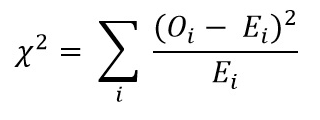

In [128]:
class ChiSquare:
    def __init__(self, observed):
        self.observed = observed
        

    def test(self):
        n = sum(observed)
        expected = [n/len(observed) for _ in observed]
        chi_square = sum([((observed[i] - expected[i]) ** 2) / expected[i] for i in range(len(observed))])
        return chi_square



    def p_value(self, df):
        return 1 - stats.chi2.cdf(self.test(), df)
    



4a Chi-Square: Suppose we have a hypothesis that a six-sided die is fair, with each side having an equal probability of landing face up. We roll the die 100 times and record the number of times each side appears
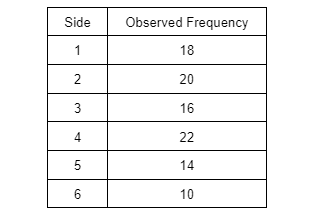

Given that the expected probabilities are equal to 1/6, Use the class CHi-Square to estimate the goodness-of-fit through chi-square test to determine whether the observed frequencies are consistent with the expected frequencies under the null hypothesis of a fair die.



In [129]:

#  the observed and expected frequencies
observed = [18, 20, 16, 22, 14, 10]

# Hypothesis
# Null Hypotheis: The observed frequencies are consistent with the expected frequencies.
# Alternative hypothesis: The observed frequencies are consistent with the expected frequencies.


# ChiSquare class
chi_sq = ChiSquare(observed_freq)

#  the test statistic and p-value with 5 degrees of freedom
test_statistic = chi_sq.test()
p_value = chi_sq.p_value(df=5)

# Print the results
print(f"Chi-square test statistic: {test_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value > 0.05:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")


Chi-square test statistic: 5.600
P-value: 0.347
Fail to reject the null hypothesis



5 Create a class and name it AB testing that inherits the two sample t-test  from the class T-test  


5a A/B testing: Suppose a company has launched a new flavor of soda and wants to test if it has a higher preference than the old flavor. The company conducts a survey with a sample of 30 customers, randomly split into two groups of 15. One group is given the old flavor of soda and the other group is given the new flavor of soda. Each participant rates their preference on a scale of 1 to 10.

Old Flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5]
New Flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]

State the null and alternative hypotheses.
Use two sample t-test to determine whether there is a significant difference in preference between the old and new flavors of soda, with a significance level of 0.05
Interpret the results



In [130]:

from scipy import stats

class Ttest:
    def __init__(self):
        pass

    def two_sample_ttest(self, sample1, sample2):
        t_statistic, p_value = stats.ttest_ind(sample1,sample2)
        return t_statistic, p_value

class ABtesting(Ttest):
    def __init__(self):
        # initialize the ABtesting class
        super().__init__()

old_flavor = [6, 7, 8, 5, 6, 7, 5, 8, 6, 7, 5, 6, 7, 6, 5]
new_flavor = [8, 9, 7, 8, 9, 6, 7, 8, 7, 8, 7, 8, 9, 6, 8]

# Null hypothesis (H0): There is no significant difference in preference between the old and new flavors of soda (i.e., the population means of the two groups are equal).
# Alternative hypothesis (H1): There is a significant difference in preference between the old and new flavors of soda (i.e., the population means of the two groups are not equal).

abtest = ABtesting()
t_statistic,p_value = abtest.two_sample_ttest(old_flavor,new_flavor)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We  reject the null hypothesis")


t-statistic: -3.815929867636064
p-value: 0.0006868217697366416
We  reject the null hypothesis
